<a href="https://colab.research.google.com/github/doosanpark/BootExample/blob/master/mnist_deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
import keras

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("x_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("x_test shape", x_test.shape)
print("y_test shape", y_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
x_train shape (60000, 28, 28)
y_train shape (60000,)
x_test shape (10000, 28, 28)
y_test shape (10000,)


In [ ]:
X_train = x_train.reshape(60000, 784)
X_test = x_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [ ]:
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)
print("Y Training matrix shape", Y_train.shape)
print("Y Testing matrix shape", Y_test.shape)

Y Training matrix shape (60000, 10)
Y Testing matrix shape (10000, 10)


In [ ]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8763 - loss: 0.4260
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9731 - loss: 0.0862
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9843 - loss: 0.0518
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9878 - loss: 0.0359
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9919 - loss: 0.0249
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9933 - loss: 0.0203
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9947 - loss: 0.0170
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9946 - loss: 0.0151
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9949 - loss: 0.0155
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9964 - loss: 0.0105


In [ ]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9714 - loss: 0.1363
Test score: 0.10580738633871078
Test accuracy: 0.9764000177383423


In [ ]:
predicted_classes = np.argmax(model.predict(X_test), axis=1)
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
 predicted_classes
correct_indices
incorrect_indices

array([   8,  115,  149,  247,  321,  340,  412,  460,  495,  582,  619,
        646,  659,  674,  684,  691,  692,  720,  726,  839,  846,  866,
        877,  882,  900,  947,  951,  956, 1003, 1014, 1022, 1039, 1101,
       1112, 1156, 1226, 1242, 1247, 1253, 1272, 1289, 1299, 1319, 1325,
       1328, 1393, 1395, 1425, 1522, 1530, 1549, 1584, 1609, 1621, 1670,
       1681, 1717, 1748, 1855, 1901, 1911, 1955, 1973, 2001, 2004, 2024,
       2035, 2040, 2053, 2070, 2073, 2109, 2125, 2130, 2135, 2224, 2225,
       2272, 2291, 2293, 2339, 2369, 2387, 2395, 2445, 2447, 2460, 2488,
       2597, 2607, 2654, 2771, 2829, 2877, 2896, 2921, 2939, 2953, 3023,
       3062, 3073, 3117, 3225, 3289, 3323, 3333, 3336, 3388, 3405, 3451,
       3475, 3503, 3520, 3558, 3559, 3601, 3629, 3702, 3726, 3727, 3763,
       3776, 3780, 3796, 3818, 3853, 3871, 3902, 3906, 3941, 4017, 4065,
       4078, 4116, 4123, 4176, 4177, 4193, 4194, 4199, 4207, 4248, 4271,
       4289, 4300, 4355, 4360, 4433, 4437, 4443, 44

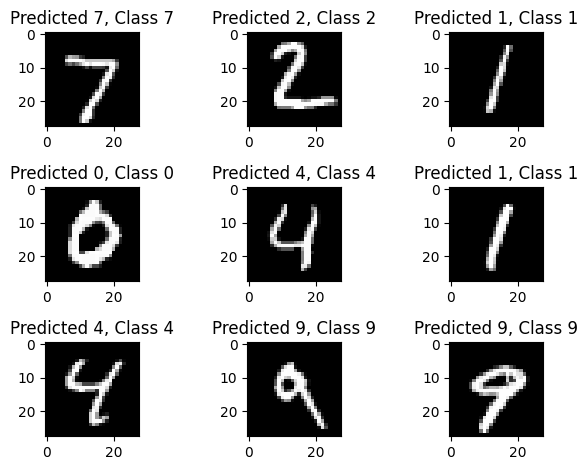

In [ ]:
plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  correct = correct_indices[i]
  plt.imshow(x_test[correct].reshape(28,28), cmap='gray')
  plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
plt.tight_layout()

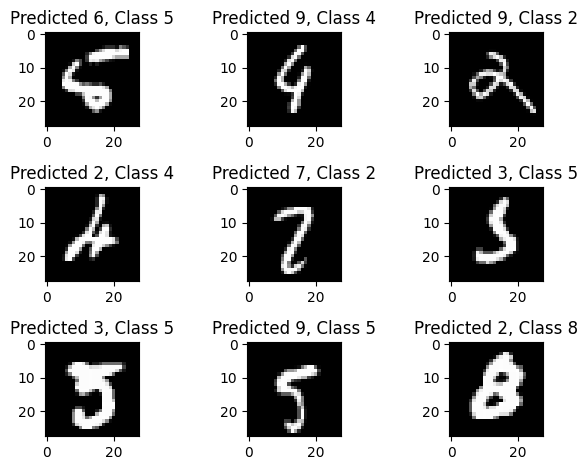

In [ ]:
plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  incorrect = incorrect_indices[i]
  plt.imshow(x_test[incorrect].reshape(28,28), cmap='gray')
  plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
plt.tight_layout()